# Getting the data

In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('Codeacademy_Webscrapper_20210107154307.csv')
df.head(10)

,Unnamed: 0,Topic Title,Category,Tags,Leading Comment,Other Comments,Likes,Views
0,0,[How to] Format code in posts,Getting Started,[],Codecademy Discuss posts are parsed with Markd...,[],21,13.9k
1,1,Guide: A list of how-to’s for giving and recei...,Getting Started,[],Technical guides will teach you how to use the...,[],0,0
2,2,Guide: Learn about our community forums,Getting Started,[],Take a moment and read through each of these b...,[],0,0
3,3,[How-to] Create a topic that everyone will read,Getting Started,[],A great topic is one that provides potential h...,[],0,0
4,4,[Learn More] How the forum is organized,Getting Started,[],"With Codecademy Community forums, conversation...",[],0,0
5,5,[Learn more] Welcome to the Codecademy Communi...,Getting Started,[],"Hi there,\nWe’re delighted to have you join us...",[],0,0
6,6,How to ask good questions (and get good answers),Getting Started,[],"In general, your post will get a good answer i...",[],47,11.8k
7,7,Welcome to our forums! Please Introduce Yourself,Getting Started,[],Hello!\nThere are so many learners on this for...,['Hello!\nThere are so many learners on this f...,26.5k,141k
8,8,[Learn more] Being a good user of the forums,Getting Started,[],"We’re all here to keep evolving by learning, t...",[],0,0
9,9,Meet our team of Superusers!,Getting Started,[],"Hi learners,\nHave you met our team of Superus...","['Hi learners,\nHave you met our team of Super...",175,588


# Explore the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5464 non-null   int64 
 1   Topic Title      5464 non-null   object
 2   Category         5464 non-null   object
 3   Tags             5464 non-null   object
 4   Leading Comment  5464 non-null   object
 5   Other Comments   5464 non-null   object
 6   Likes            5464 non-null   object
 7   Views            5464 non-null   object
dtypes: int64(1), object(7)
memory usage: 341.6+ KB


In [3]:
#to see any null value present in our dataset
df.isnull().sum()

Unnamed: 0         0
Topic Title        0
Category           0
Tags               0
Leading Comment    0
Other Comments     0
Likes              0
Views              0
dtype: int64

#### So Dataset has no null values

Text(0, 0.5, 'no of posts')

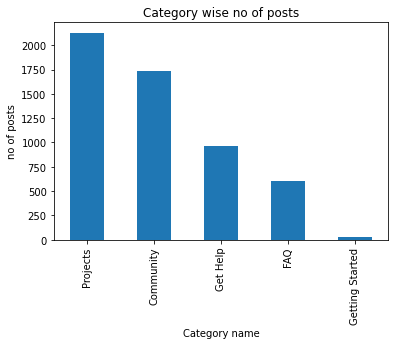

In [4]:
df['Category'].value_counts().plot.bar()
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

<AxesSubplot:ylabel='Category'>

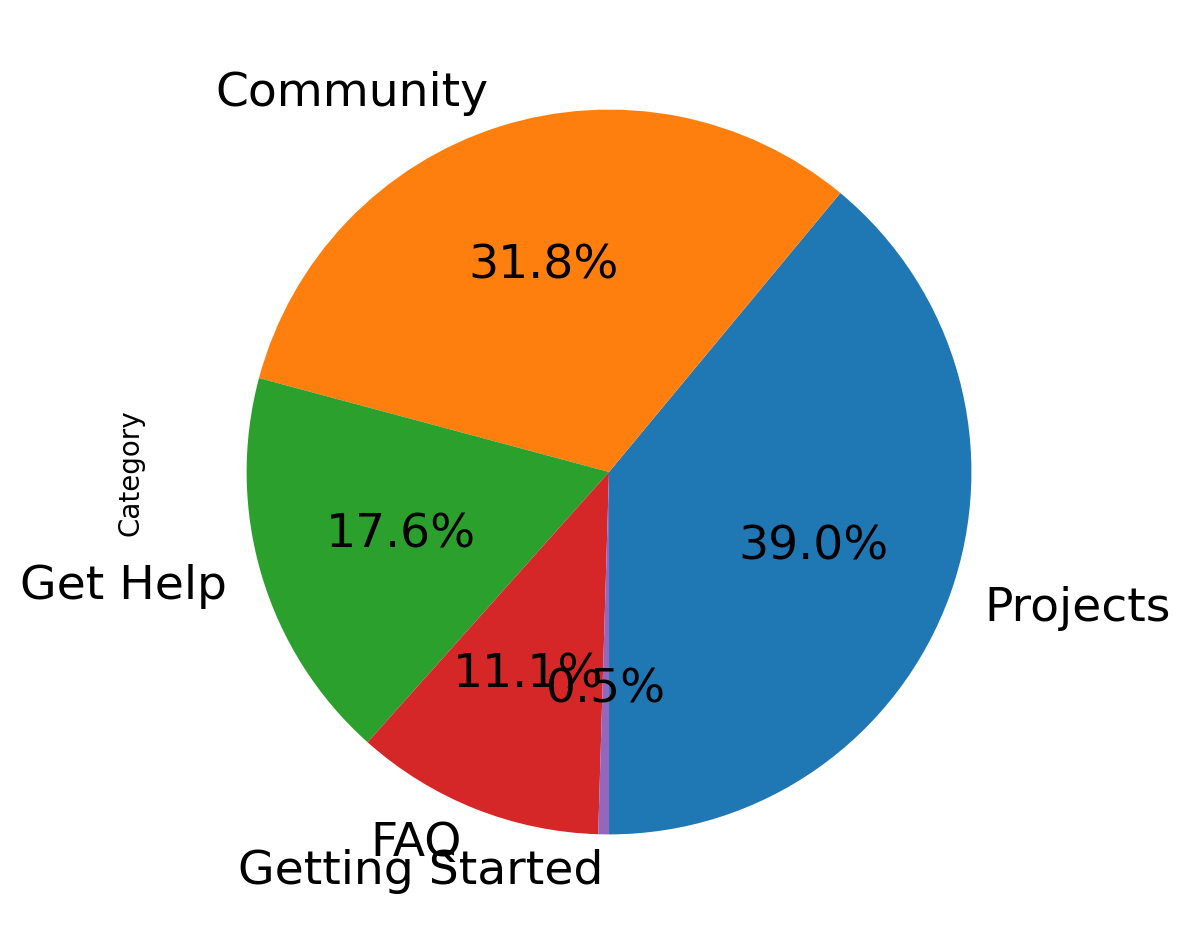

In [5]:
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111)

df['Category'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)


In [6]:
df['post'] = df['Topic Title'] + ' ' + df['Leading Comment'] + ' ' + df['Other Comments']

df['post'].head()

0    [How to] Format code in posts Codecademy Discu...
1    Guide: A list of how-to’s for giving and recei...
2    Guide: Learn about our community forums Take a...
3    [How-to] Create a topic that everyone will rea...
4    [Learn More] How the forum is organized With C...
Name: post, dtype: object

## Table generation with Word count,Char count, Avg Word count & Stopwords

In [7]:
df['word_count'] = df['post'].apply(lambda x: len(str(x).split(" "))) ##to calculate word count 
df['char_count'] = df['post'].str.len() ## this also includes spaces
#to calculate avg word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['post'].apply(lambda x: avg_word(x))
#for stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['post'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['post','word_count','char_count','avg_word','stopwords']].head()

,post,word_count,char_count,avg_word,stopwords
0,[How to] Format code in posts Codecademy Discu...,324,1788,5.174074,67
1,Guide: A list of how-to’s for giving and recei...,92,549,4.480000,32
2,Guide: Learn about our community forums Take a...,81,534,5.045455,26
3,[How-to] Create a topic that everyone will rea...,197,1181,4.679612,70
4,[Learn More] How the forum is organized With C...,130,817,4.834532,46


In [8]:
Compare=df.loc[:,['word_count','stopwords']]
Compare.describe()

,word_count,stopwords
count,5464.000000,5464.000000
mean,2393.920571,732.157760
std,5522.879270,1609.543542
min,6.000000,0.000000
25%,180.750000,59.000000
50%,593.000000,184.000000
75%,1953.000000,591.250000
max,105114.000000,20556.000000


In [11]:
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
DIGITS_RE=re.compile('\w*\d\w*')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace(r'\n', ' ')
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = DIGITS_RE.sub('', text)
    return text

In [12]:
df['post']=df['post'].apply(clean_text)

In [14]:
# Removing extra spaces
df['post']=df['post'].apply(lambda x: re.sub(' +',' ',x))

# Frequent words

In [15]:
## 10 Common word removal
freq = pd.Series(' '.join(df['post']).split()).value_counts()[:10]
freq

code        53648
return      44931
get         33362
like        32206
function    31084
print       30694
would       28919
+           28365
use         28075
const       25936
dtype: int64

In [16]:
freq = list(freq.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['post'].head()

0    format posts codecademy discuss posts parsed m...
1    guide list howto giving receiving codehelp tec...
2    guide learn community forums take moment read ...
3    howto create topic everyone read great topic o...
4    learn forum organized codecademy community for...
Name: post, dtype: object

# Rare words

In [17]:
##10 Rare words removal
rare = pd.Series(' '.join(df['post']).split()).value_counts()[-10:]
rare

noteshere                  1
#ubof#                     1
instructionthanks          1
oneteam                    1
mtffor                     1
gibthub                    1
followingpost              1
customer_idandcustomers    1
newesthints                1
winwin                     1
dtype: int64

In [18]:
rare = list(rare.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df['post'].head()

0    format posts codecademy discuss posts parsed m...
1    guide list howto giving receiving codehelp tec...
2    guide learn community forums take moment read ...
3    howto create topic everyone read great topic o...
4    learn forum organized codecademy community for...
Name: post, dtype: object

# Lemmatization 

In [19]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization 
df['post']=df['post'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) ]))

In [20]:
df_grouped=df[['Category','post']].groupby(by='Category').agg(lambda x:' '.join(x))
df_grouped

,post
Category,
Community,ts codecademy follow find guideline page good ...
FAQ,faq category category lock admin post new topi...
Get Help,help category ask question help exercise chat ...
Getting Started,format post codecademy discuss post parse mark...
Projects,project category share work feedback community...


# Creating Document Term Matrix

In [21]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['post'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

,_________________should,___application,___get,___place,a_b,a_cost,a_costprint,a_dict,a_factor_of_n,a_list,...,zuckeberg,zundoshift,zvals,zvalue,zwijgen,zx,zybook,zyou,zystvan,zystvani
Category,,,,,,,,,,,,,,,,,,,,,
Community,0,0,0,0,0,0,0,0,10,0,...,1,1,0,0,20,0,4,0,196,0
FAQ,0,0,0,0,0,0,0,6,0,10,...,0,0,0,0,0,0,0,0,1,5
Get Help,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Getting Started,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Projects,1,3,6,3,2,17,1,0,0,0,...,0,0,1,2,0,1,0,1,0,0


# Wordcloud generation

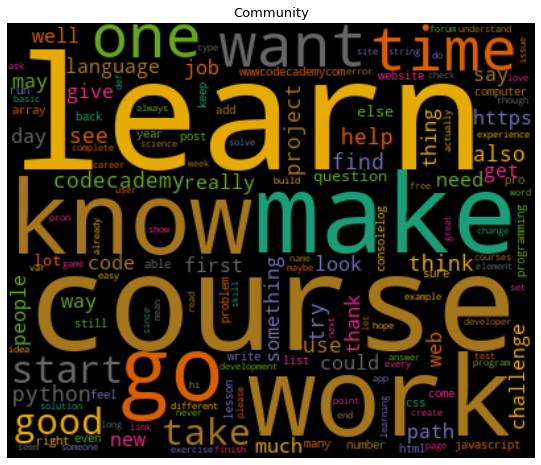

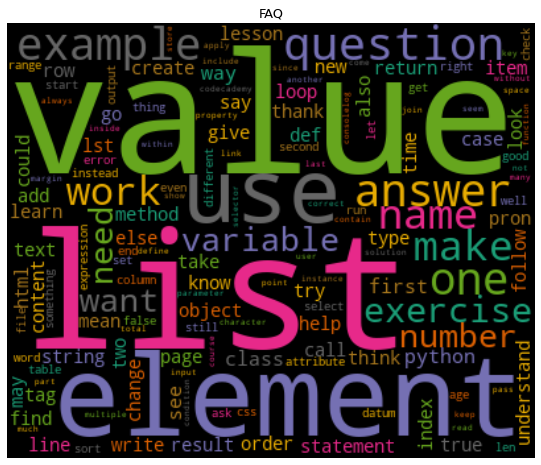

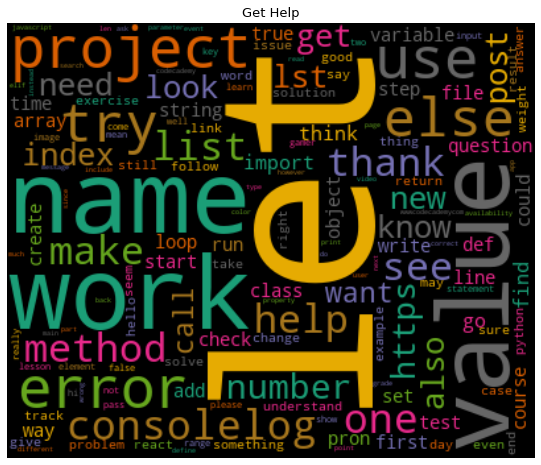

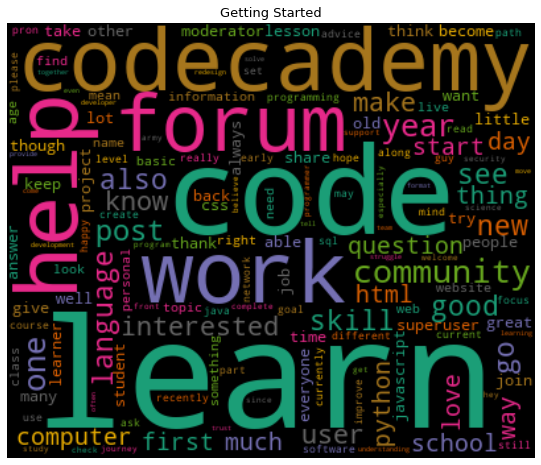

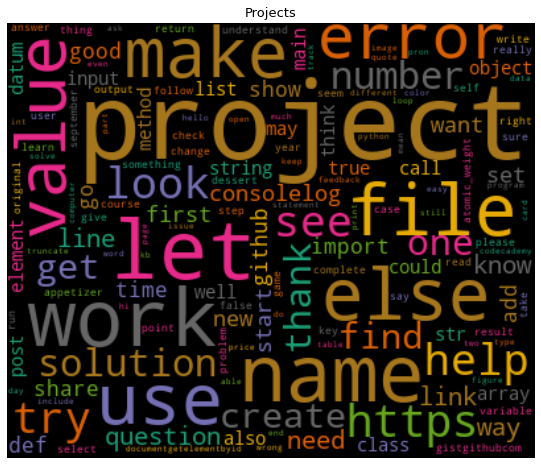

In [22]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
  
#  Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each category
for index,category in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[category].sort_values(ascending=False),category)

# Sentiment Analysis

In [23]:
# checking only the polarity
from textblob import TextBlob
df['polarity']=df['post'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [24]:
print("3 Random post with Highest Polarity:")
for index,post in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['post']):
    print('post {}: '.format(index+1),post)

3 Random post with Highest Polarity:
post 1:  churn rate project sql codeflix hi presentation sql project churn rate look forward comment thank youall best kb kb kb kb kb kb kb kb kb
post 2:  chat chat coder chat codershey look chat may find people probably best hang discord server check https discordgg ngqweyn
post 3:  netflix data capstone project feedback welcome skill path visualize data pythondear finish capstone project happy receive comment feedbacklink folder data presentationhttps drivegooglecom drive folder much happy codingnicol


In [26]:
print("3 Random posts with Lowest Polarity:")
for index,post in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['post']):
    print('\n \n \n post {}: '.format(index+1),post)

3 Random posts with Lowest Polarity:

 
 
 post 1:  jeopardy data science path data analysis pandas python library section hello everyone base jeopardy challenge project make python pandas library solo player jeopardy console gamefallow link powerpoint presentation projectjeopardy console game presentation jeopardy console game fallowing link powerpoint presentation codecademy jeopardy projectcodecademy jeopardy project

 
 
 post 2:  sleepdebtcalculator project problem kbhelloi try understand wrong console printing nan think miss pointcould someone help methank advancelvaro kb hello try understand wrong console printing nan think miss point could someone help thank advance lvaro solve post # add number string together nan number could add default day see argument typo seem thursday kb hello try understand wrong console printing nan think miss point could someone help thank advance lvaro solve post # add number string together nan number could add default day see argument typo seem thu

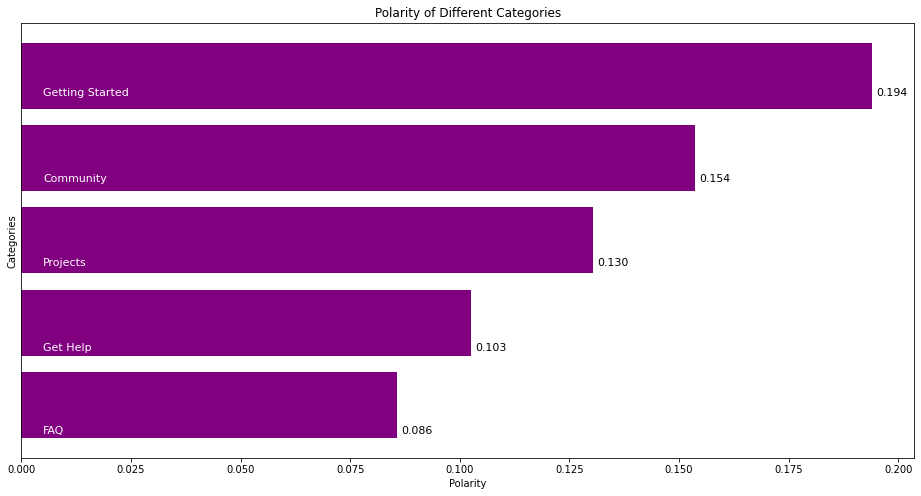

In [27]:
category_polarity_sorted=pd.DataFrame(df.groupby('Category')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Categories')
plt.title('Polarity of Different Categories')
polarity_graph=plt.barh(np.arange(len(category_polarity_sorted.index)),category_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,category in zip(polarity_graph,category_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(category),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,category_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()